## Lab 9: AE1: Implementacja algorytmu genetycznego – opt. f-cji kwadratowej w R3 (1 tydzień, bez punktów)  

Napisać podstawowy algorytm genetyczny z mutacją gaussowską i krzyżowaniem jednopunktowym.  

Sprawdzić działanie algorytmu na funkcji $x^2+y^2+2z^2$ oraz na pięciowymiarowej funkcji Rastrigina.

## TODO:
- ~~implement basic genetic algorithm with gaussian mutation and single-point crossover~~
- ~~check if the algorithm works on the function $x^2+y^2+2z^2$~~
- ~~check if the algorithm works on the five-dimensional Rastrigin function~~


In [1]:
import numpy as np
import math

## Initializing population

In [2]:
def initialize_population(size,boundary,dim):
    return np.random.uniform(boundary[0],boundary[1],size=(size,dim))

In [3]:
population_size = 7
boundary = [-10,10]
population = initialize_population(size=population_size,boundary=boundary, dim=3)
print("Initial population:")
print(population)

Initial population:
[[ 9.58308636 -9.68959281 -8.37144159]
 [ 2.12338217  9.21290923 -2.01994409]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  7.81456896  7.16569482]
 [ 2.11692907  1.61087502 -7.62833013]
 [ 4.14394721  7.46818068  9.5560016 ]]


## Single point crossover

In [4]:
def crossover(population):
    def cross_single(parent1,parent2):
        cross_point = np.random.randint(1,3)
        return np.vstack((np.hstack((parent1[:cross_point], parent2[cross_point:])),
                        np.hstack((parent2[:cross_point], parent1[cross_point:]))))

    def cross_single_vect(pop):
        return np.vstack([cross_single(parent1,parent2) for parent1,parent2 in zip(pop[::2],pop[1::2])])

    selected_pairs_ids =  np.repeat(np.random.uniform(0,1,size=(math.floor(population_size/2),1)) > 0.3,2)
    population[:len(selected_pairs_ids)][selected_pairs_ids]  = cross_single_vect(population[:len(selected_pairs_ids)][selected_pairs_ids])
    return population

In [5]:
print("Befor crossover:")
print(population)
print("After crossover:")
print(crossover(population))

Befor crossover:
[[ 9.58308636 -9.68959281 -8.37144159]
 [ 2.12338217  9.21290923 -2.01994409]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  7.81456896  7.16569482]
 [ 2.11692907  1.61087502 -7.62833013]
 [ 4.14394721  7.46818068  9.5560016 ]]
After crossover:
[[ 9.58308636  9.21290923 -2.01994409]
 [ 2.12338217 -9.68959281 -8.37144159]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  1.61087502 -7.62833013]
 [ 2.11692907  7.81456896  7.16569482]
 [ 4.14394721  7.46818068  9.5560016 ]]


## Gaussian mutation

In [6]:
def mutate(population):
    return population + np.random.normal(0,1,size=population.shape) * (np.random.uniform(0,1,size=population_size) > 0.8).reshape((-1,1))

In [7]:
print("Befor mutation:")
print(population)
print("After mutation:")
print(mutate(population))

Befor mutation:
[[ 9.58308636  9.21290923 -2.01994409]
 [ 2.12338217 -9.68959281 -8.37144159]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  1.61087502 -7.62833013]
 [ 2.11692907  7.81456896  7.16569482]
 [ 4.14394721  7.46818068  9.5560016 ]]
After mutation:
[[ 9.58308636  9.21290923 -2.01994409]
 [ 2.12338217 -9.68959281 -8.37144159]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 5.30464072  4.15778741  3.56572655]
 [-1.19134742  1.61087502 -7.62833013]
 [ 2.11692907  7.81456896  7.16569482]
 [ 4.14394721  7.46818068  9.5560016 ]]


## Fitness function for the first function

In [8]:
def evaluate(population):
    return population[:,0]**2 + population[:,1]**2 + 2 * population[:,2]**2

In [9]:
scores = evaluate(population)
print("Scores:")
print(scores)

Scores:
[184.87358897 238.55902909 138.05933896  65.84333116 120.39706821
 168.24324115 255.58035434]


## Tournament

In [10]:
tournament_size = 3
selected = np.random.choice(population_size,size=population_size,replace=True)
print("Selected before tournament:")
print(selected)
for i,selected_id in enumerate(selected):
    for new_id in np.random.choice(population_size,size=tournament_size,replace=True):
        if scores[selected_id] < scores[new_id]:
            selected[i] = new_id
print("Selected after tournament:")
print(selected)

Selected before tournament:
[4 6 1 4 3 5 6]
Selected after tournament:
[2 6 1 0 2 6 6]


In [11]:
def tournament(population,scores,tournament_size):
    selected = np.random.choice(population_size,size=population_size,replace=True)
    for i,selected_id in enumerate(selected):
        for new_id in np.random.choice(population_size,size=tournament_size,replace=True):
            if scores[selected_id] > scores[new_id]:
                selected[i] = new_id
    return population[selected]

In [12]:
print("Population before tournament:")
print(population)
tournament_size = 3
print("Population after tournament:")
print(tournament(population,scores,tournament_size))

Population before tournament:
[[ 9.58308636  9.21290923 -2.01994409]
 [ 2.12338217 -9.68959281 -8.37144159]
 [-5.15707127 -2.78870841 -7.20024515]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  1.61087502 -7.62833013]
 [ 2.11692907  7.81456896  7.16569482]
 [ 4.14394721  7.46818068  9.5560016 ]]
Population after tournament:
[[-1.19134742  1.61087502 -7.62833013]
 [ 4.77208986  4.11407305  3.61558381]
 [ 4.77208986  4.11407305  3.61558381]
 [-1.19134742  1.61087502 -7.62833013]
 [-5.15707127 -2.78870841 -7.20024515]
 [-1.19134742  1.61087502 -7.62833013]
 [ 4.77208986  4.11407305  3.61558381]]


## Relocating population points inside the search space

In [13]:
def fix_boundary(population, boundary):
    population[population < boundary[0]] = boundary[0]
    population[population > boundary[1]] = boundary[1]
    return population

## All together - a simple function

with minimum in (0,0,0) of value 0

Epoch 0: 3.3700325813972585
Epoch 10: 0.11737606447973176
Epoch 20: 0.024078430690029264
Epoch 30: 0.024078430690029264
Epoch 40: 0.024078430690029264
Epoch 50: 0.022247699376973976
Epoch 60: 0.022247699376973976
Epoch 70: 0.013612070889368087
Epoch 80: 0.013082485557263176
Epoch 90: 0.006153815659791922
Best solution: [ 0.01292287 -0.07704735 -0.00502601]


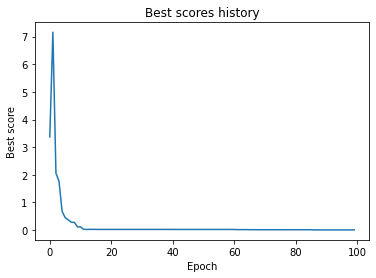

In [14]:
population_size = 100
tournament_size = 3
boundary = [-10,10]
epochs = 100
dim=3

population = initialize_population(size=population_size,boundary=boundary,dim=dim)
best_solution, best_score = 0, evaluate(population[0].reshape((1,-1)))
best_scores_history = []
for epoch in range(epochs):
    population = crossover(population)
    population = mutate(population)
    population = fix_boundary(population,boundary)
    scores = evaluate(population)
    best_solution, best_score = population[np.argmin(scores)], np.min(scores)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: {best_score}")
    best_scores_history.append(best_score)
    population = tournament(population,scores,tournament_size)
print(f"Best solution: {best_solution}")
import matplotlib.pyplot as plt
plt.plot(best_scores_history)
plt.title("Best scores history")
plt.xlabel("Epoch")
plt.ylabel("Best score")
plt.show()

## Rastrigin evaluation function

In [15]:
def evaluation_rastrigin(x):
    return 10 * len(x[0]) + np.sum(  x**2 - 10 * np.cos(2 * np.pi * x),axis=1)

## Rastrigin function solution

with minimum in (0,0,0,0,0) of value 0

Epoch 0: 38.89349285701037
Epoch 10: 6.996798869248309
Epoch 20: 6.430672418234337
Epoch 30: 4.577611660225564
Epoch 40: 4.274641323951158
Epoch 50: 4.257715973014868
Epoch 60: 4.052480520318255
Epoch 70: 4.052480520318255
Epoch 80: 3.028694017181458
Epoch 90: 2.814707100498204
Best solution: [ 2.60737899e-04 -2.03632519e-02  2.94352597e-02 -9.00270668e-02
  9.93474563e-01]


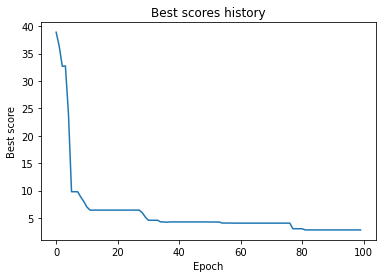

In [16]:
population_size = 500
tournament_size = 3
boundary = [-10,10]
epochs = 100
dim=5

population = initialize_population(size=population_size,boundary=boundary,dim=dim)
best_solution, best_score = 0, evaluation_rastrigin(population[0].reshape((1,-1)))
best_scores_history = []
for epoch in range(epochs):
    population = crossover(population)
    population = mutate(population)
    population = fix_boundary(population,boundary)
    scores = evaluation_rastrigin(population)
    best_solution, best_score = population[np.argmin(scores)], np.min(scores)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: {best_score}")
    best_scores_history.append(best_score)
    population = tournament(population,scores,tournament_size)
print(f"Best solution: {best_solution}")
import matplotlib.pyplot as plt
plt.plot(best_scores_history)
plt.title("Best scores history")
plt.xlabel("Epoch")
plt.ylabel("Best score")
plt.show()

# Summary

Algorithm does indeed work on the function $x^2+y^2+2z^2$ and on the five-dimensional Rastrigin function.